In [1]:
import cv2
from matplotlib import pyplot as plt
from tools import tracker

In [2]:
%matplotlib inline

Particle Filter tracking
=======================

The filtering is handled by the tracker.track() function, here is how this works:

In [3]:
help(tracker.track)

Help on function track in module tools.tracker:

track(input, w_cx, w_cy, w_w, w_h, N, sigma, alpha=None, output=None, display=True, frames_to_save=None)
    apply particle filter to track something in a video
    :param input: the path string of the input video
    :param w_cx: position of the window center (x)
    :param w_cy: position of the window center (y)
    :param w_w: window width
    :param w_h: window height
    :param N: the amount of particles
    :param sigma: the smoothing factor
    :param alpha: the alpha factor used in appearance model update
    :param output: the basename of the output video, it will be extended with params values
    :param display: boolean indicating whenever to display the frame as they are beeing tracked
    :param frames_to_save: a list of frames to save, those will be saved as jpg an returned as result
    :return: the dict of the saved frames



1.1
---

In [4]:
saved_frames = tracker.track('inputs/pres_debate.avi', 239, 371, 64, 51, N=5000, sigma=10, alpha=None, display=False, output='Q1', frames_to_save=[28, 84, 144])

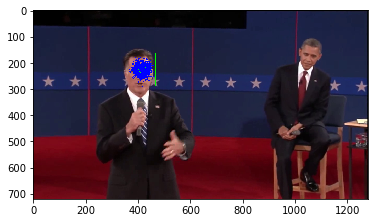

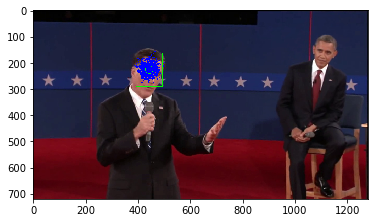

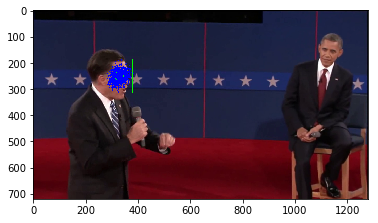

In [9]:
for frame in saved_frames.values():
    b, g, r = cv2.split(frame)
    plt.imshow(cv2.merge([r, g, b]))
    plt.show()

1.2
----

here are now the results for half and twice the size of the previous window:

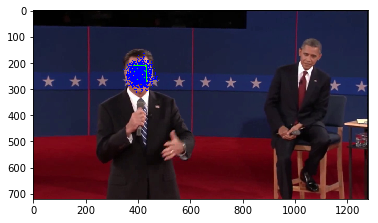

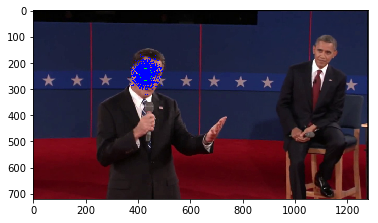

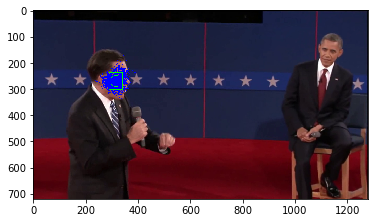

In [10]:
saved_frames = tracker.track('inputs/pres_debate.avi', 239, 371, 32, 25, N=5000, sigma=10, alpha=None, display=False, output='Q1', frames_to_save=[28, 84, 144])
for frame in saved_frames.values():
    b, g, r = cv2.split(frame)
    plt.imshow(cv2.merge([r, g, b]))
    plt.show()

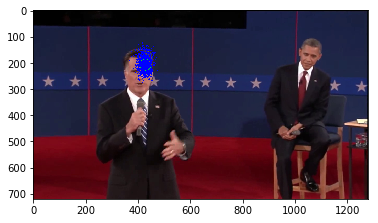

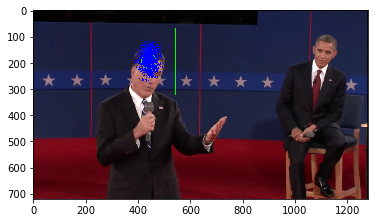

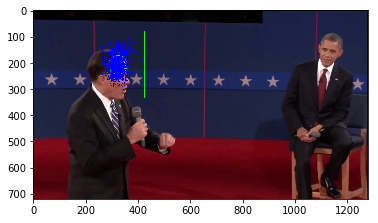

In [11]:
saved_frames = tracker.track('inputs/pres_debate.avi', 239, 371, 128, 102, N=5000, sigma=10, alpha=None, display=False, output='Q1', frames_to_save=[28, 84, 144])
for frame in saved_frames.values():
    b, g, r = cv2.split(frame)
    plt.imshow(cv2.merge([r, g, b]))
    plt.show()

As we can see, small windows allows to track some objects more accurately, but it can lead to some confusion: the skin color of his hand, can confuse the filter has it has a low MSE too. Finally small windows are less affected by the border of the image.

1.3:

The *sigma* param correspond to the smoothness param: it allows to less penalize suboptimal MSE. By increasing the values, we expect the particles to spread more easily. At the opposite we would expect lower values to make particle stick more to the optima.

unfortunately i've been unable to add the computation of this function without numerical problems: the high values of the SSE leads to zeros values after applying. Stangely, using pre-normalization leads to nan...

1.4 as i compute the SSE over the entire image using the cv2.matchTemplate function, i could afford using a lot of particles. Here are examples with fewer particles to see the impact.

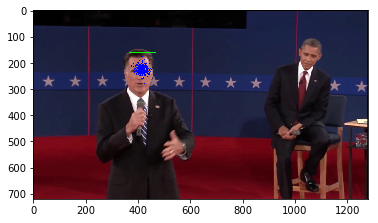

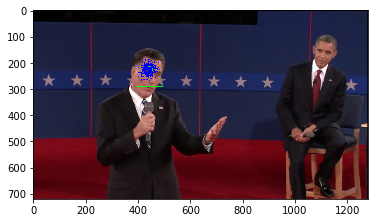

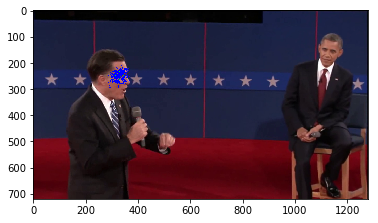

In [4]:
saved_frames = tracker.track('inputs/pres_debate.avi', 239, 371, 64, 51, N=1000, sigma=10, alpha=None, display=False, output='Q1', frames_to_save=[28, 84, 144])
for frame in saved_frames.values():
    b, g, r = cv2.split(frame)
    plt.imshow(cv2.merge([r, g, b]))
    plt.show()

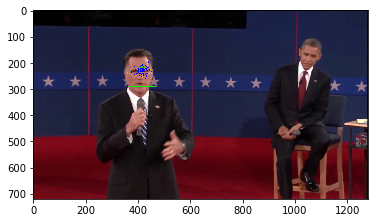

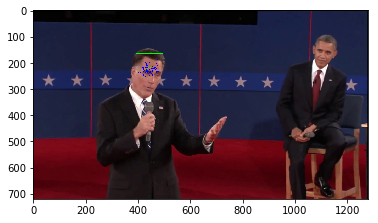

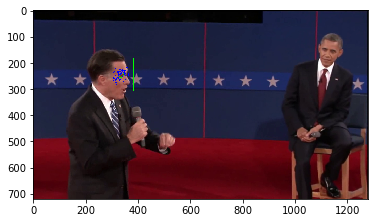

In [5]:
saved_frames = tracker.track('inputs/pres_debate.avi', 239, 371, 64, 51, N=200, sigma=10, alpha=None, display=False, output='Q1', frames_to_save=[28, 84, 144])
for frame in saved_frames.values():
    b, g, r = cv2.split(frame)
    plt.imshow(cv2.merge([r, g, b]))
    plt.show()

Here we can see that even with a few particles the results are still consistents, altought the windows tends to be a bit more shaky. The computation time is better (on the resampling phase, as the SSE is computed over the entire image)

1.5
---

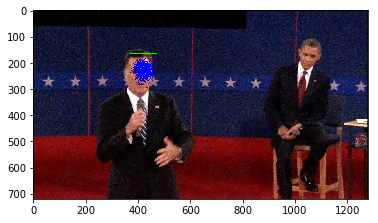

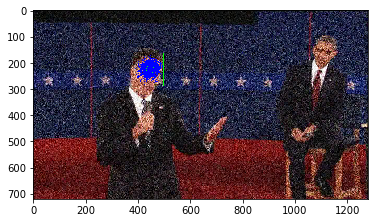

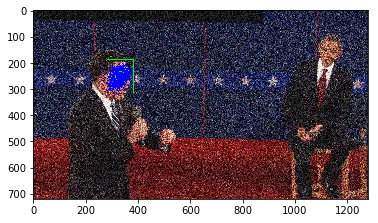

In [8]:
saved_frames = tracker.track('inputs/noisy_debate.avi', 239, 371, 64, 51, N=5000, sigma=10, alpha=None, display=False, output='Q15', frames_to_save=[28, 84, 144])
for frame in saved_frames.values():
    b, g, r = cv2.split(frame)
    plt.imshow(cv2.merge([r, g, b]))
    plt.show()

As we have many particles, the face is still tracked, but during the noisy perdiods, the particles tends to spread out, uniformly in all the directions. During this period the window is not moving, but the spreading of the particles allow to quickly reframe the face.

2 Appearance model update:
==========================

Here is the hand tracking, with model update enabled:

In [ ]:
saved_frames = tracker.track('inputs/pres_debate.avi', 433, 578, 30, 60, N=5000, sigma=10, alpha=None, display=False, output='Q2', frames_to_save=[28, 84, 144])
for frame in saved_frames.values():
    b, g, r = cv2.split(frame)
    plt.imshow(cv2.merge([r, g, b]))
    plt.show()